In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df["Types"] = df.target.apply(lambda x: iris.target_names[x])

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Types
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   Types              150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df["Types"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Types, dtype: int64

In [7]:
df.isnull().sum().sum()

0

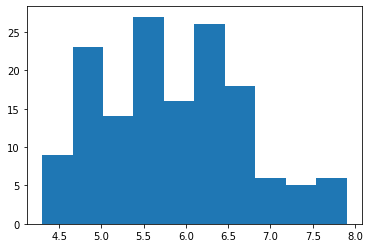

In [8]:
plt.hist(df["sepal length (cm)"])
plt.show()

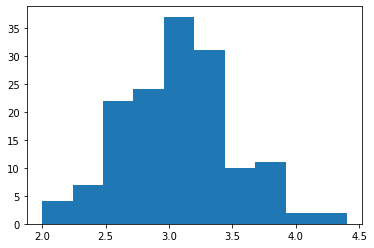

In [9]:
plt.hist(df["sepal width (cm)"])
plt.show()

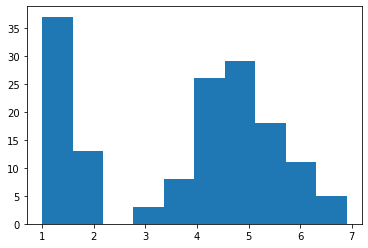

In [10]:
plt.hist(df["petal length (cm)"])
plt.show()

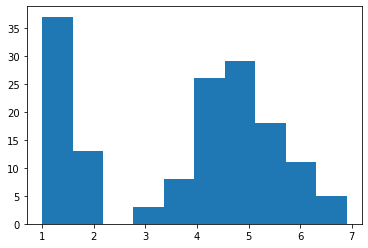

In [11]:
plt.hist(df["petal length (cm)"])
plt.show()

In [33]:
type_List = df["Types"].unique()
type(type_List)
color = ['blue', 'black', 'red']



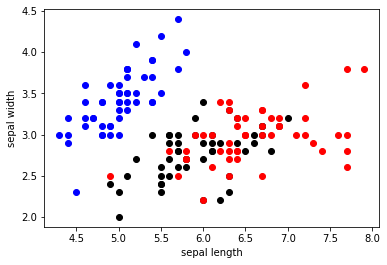

In [13]:
for x in range(3):
    df_type = df[df["Types"] == type_List[x]]
    plt.scatter(df_type["sepal length (cm)"], df_type["sepal width (cm)"], color = color[x])
    
plt.xlabel("sepal length")
plt.ylabel("sepal width")

plt.show()

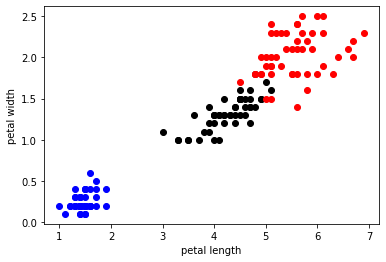

In [14]:
for x in range(3):
    df_type = df[df["Types"] == type_List[x]]
    plt.scatter(df_type["petal length (cm)"], df_type["petal width (cm)"], color = color[x])
    
plt.xlabel("petal length")
plt.ylabel("petal width")
 
plt.show()

In [15]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# df["Types"] = le.fit_transform(df["Types"])
# df

In [16]:
x = df.drop(columns = ["target","Types"])
y = df["target"]


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 

In [18]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

/home/emmo/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
model_logistic.score(X_test, y_test)

0.9666666666666667

In [20]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
kn.score(X_test, y_test)

1.0

In [22]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
dt.score(X_test, y_test)

0.9666666666666667

In [24]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
131,7.9,3.8,6.4,2.0
24,4.8,3.4,1.9,0.2
5,5.4,3.9,1.7,0.4
26,5.0,3.4,1.6,0.4
85,6.0,3.4,4.5,1.6
86,6.7,3.1,4.7,1.5
73,6.1,2.8,4.7,1.2
80,5.5,2.4,3.8,1.1
2,4.7,3.2,1.3,0.2
8,4.4,2.9,1.4,0.2


In [25]:
model_logistic.predict(x[77:78])

array([2])

In [26]:
kn.predict(x[120:121])

array([2])

In [27]:
dt.predict(x[85:86])

array([1])